In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

In [6]:
# Pipeline For Image to feature Vector
import os
from skimage import color
from skimage import transform
labels = ['Bacterial_leaf_blight', 'Brown_spot', 'Leaf_smut']
images_Vector = []
for d in os.listdir('data'):
    for image in os.listdir(f'data\\{d}'):
        #Loading Image
        img = io.imread(f'data\\{d}\\{image}')
        # To Gray
        gray_img = color.rgb2gray(img)
        #Resizing
        resized_img = transform.resize(gray_img, (56,56))
        image_vector = resized_img.ravel()
        # print(image_vector.shape, labels.index(d))
        images_Vector.append([image_vector, labels.index(d)])


In [7]:
# Featur and target
images_vectors = np.array([image[0] for image in images_Vector])
Labels = np.array([image[1] for image in images_Vector])

In [8]:
images_vectors[0], Labels[0]

(array([0.84865008, 0.84802805, 0.84797089, ..., 0.84832373, 0.84935259,
        0.85069351]),
 0)

In [9]:
# Dividing Data into Training and Testing set
from sklearn.model_selection import train_test_split
np.random.seed(42)
train_images, test_images, train_labels, test_labels = train_test_split(
    images_vectors, Labels, test_size=0.25
)

In [10]:
train_images.shape, train_labels.shape

((90, 3136), (90,))

In [11]:
# Modeling
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(train_images, train_labels.ravel())

LogisticRegression(max_iter=2000)

In [12]:
# Prediction/Validation
ypred = model.predict(test_images)
ypred[0], test_labels[0]

(1, 1)

In [13]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(ypred, test_labels)

array([[8, 4, 2],
       [1, 6, 2],
       [1, 2, 4]], dtype=int64)

C:\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


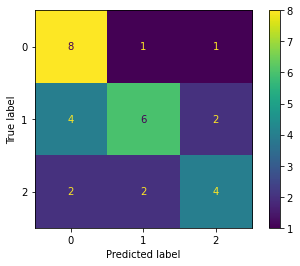

In [14]:
plot_confusion_matrix(model, test_images, test_labels.ravel())

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred, test_labels)

0.6